Enter the capacity for  0 th node: 2
Enter the capacity for  1 th node: 3
Enter the capacity for  2 th node: 4
Enter the capacity for  3 th node: 5
Enter the capacity for  4 th node: 6
[0.51053671 0.91978415 0.80445212]
[0.3913437  0.79130038 0.96810101]
[0.60882851 0.54098478 0.7369227 ]
[0.52842913 0.68288598 0.95889985]
[0.27516241 0.99243664 0.16764871]


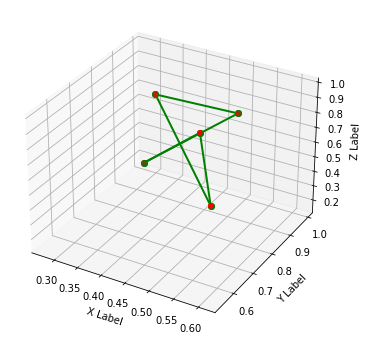

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def capacity(dictt,point1, point2):
    return dictt[point2]
    
    
    #return np.sqrt(np.sum((point1 - point2)**2)) 
def assigning_capacity(points,dictt):
    for i in range(0,len(points)):
        n=int(input(f"Enter the capacity for  {i} th node: "))
        dictt[i] = n
        
        
        
        
def ant_colony_optimization(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    n_points = len(points)
    pheromone = np.ones((n_points, n_points))
    best_path = None
    best_path_length = np.inf
    dictt={}
    assigning_capacity(points,dictt)             ### #assigning capacities to nodes
    for i in points:
        print(i)
    for iteration in range(n_iterations):
        paths = []
        path_lengths = []
        
        for ant in range(n_ants):
            visited = [False]*n_points
            current_point = np.random.randint(n_points)
            visited[current_point] = True
            path = [current_point]
            path_length = 0
            
            while False in visited:
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))
                
                for i, unvisited_point in enumerate(unvisited):
                    probabilities[i] = pheromone[current_point, unvisited_point]**alpha / capacity(dictt,current_point, unvisited_point)**beta
                
                probabilities /= np.sum(probabilities)
                
                next_point = np.random.choice(unvisited, p=probabilities)
                path.append(next_point)
                path_length += capacity(dictt,current_point,next_point)
                visited[next_point] = True
                current_point = next_point
            
            paths.append(path)
            path_lengths.append(path_length)
            
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length
        
        pheromone *= evaporation_rate
        
        for path, path_length in zip(paths, path_lengths):
            for i in range(n_points-1):
                pheromone[path[i], path[i+1]] += Q/path_length
            pheromone[path[-1], path[0]] += Q/path_length
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], c='r', marker='o')
    
    for i in range(n_points-1):
        ax.plot([points[best_path[i],0], points[best_path[i+1],0]],
                [points[best_path[i],1], points[best_path[i+1],1]],
                [points[best_path[i],2], points[best_path[i+1],2]],
                c='g', linestyle='-', linewidth=2, marker='o')
        
    ax.plot([points[best_path[0],0], points[best_path[-1],0]],
            [points[best_path[0],1], points[best_path[-1],1]],
            [points[best_path[0],2], points[best_path[-1],2]],
            c='g', linestyle='-', linewidth=2, marker='o')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

# coordinates of nodes:
points = np.random.rand(5, 3) # Generate 10 random 3D points
ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)

In [1]:
import numpy as np

# from ant_colony import AntColony
import random as rn
from numpy.random import choice as np_choice

class AntColony(object):

    def _init_(self,capacity,load,performance_measure, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1,gamma=1):
        """
        Args:
            load(1D list of len(distance) size): load % at each node of the graph waiting for computation.
            
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. Default=1
            gamma (int or float): exponent on load%, same as above detail
        Example:
            ant_colony = AntColony(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.capacity=capacity
        self.load=load
        self.performance_measure=performance_measure
        
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape)/(len(distances)-1) #normalization of pheromone values
        self.all_inds = range(len(distances)) #
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.gamma=gamma

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        x=1
        for i in range(self.n_iterations):
            for j in range(self.n_ants): #for starting at different nodes
                all_paths = self.gen_all_paths(j)
                self.spread_pheronome(all_paths, self.n_best)
                print(all_paths," here ",x)
                all_paths=all_paths[0]
            
                if all_paths[1] < all_time_shortest_path[1]:
                    all_time_shortest_path = all_paths            
                self.pheromone = self.pheromone * self.decay 
                print(self.pheromone, "pheromone :",x)
                x+=1
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, n_best):
        path,dist = all_paths[0]
        for move in path:
            print("pheromone updates for :",move)
            self.pheromone[move] += 1.0 / dist 
        

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele] 
        return total_dist

    def gen_all_paths(self,currentstart):
        all_paths = []
        path = self.gen_path(currentstart) 
        all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []  
        visited = set()
        prev = start 
        visited.add(start)
        
        predicted_load=[]
        actual_load=[] # in terms of actual memory
        deduction_load=[]
        
        for i, j in zip(self.load, self.capacity):
            actual_load.append(i * j)
       # actual_load=(self.load*self.capacity)
        for i, j in zip(actual_load,self.performance_measure):
            deduction_load.append(i*j)
            
      #  deduction_load=actual_load*self.performance_measure #performance measure is constant , which should be dynamic for real
        for i, j in zip(actual_load,deduction_load):
            predicted_load.append(i-j)
            
        predicted_load=np.array(predicted_load)
        print("predicted load: ",predicted_load)
        self.load=((predicted_load*100)/self.capacity)
        
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev],predicted_load,visited)
            path.append((prev, move)) 
            prev = move
            visited.add(move)
        path.append((prev, start))     
        
        print("load changes: ",self.load)
        return path

    def pick_move(self, pheromone, dist,predicted_load, visited):#####
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        
#         row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)*((1.0/(load-(performance_measure/100)*20))**self.gamma) #############
       
        
#print(type(dist)," ",type(predicted_load)) type checking error 

       
        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)*((1.0/(predicted_load))**self.gamma) #############
    
#         self.load=(predicted_load*100/self.capacity)
        
#         print("predicted load : ",predicted_load)
 

        norm_row = row / row.sum()  #probability for each node is calculated
        move = np_choice(self.all_inds, 1, p=norm_row)[0] 
        return move
    

distances = np.array([[np.inf, 2, 2, 5, 7],
                      [2, np.inf, 4, 8, 2],
                      [2, 4, np.inf, 1, 3],
                      [5, 8, 1, np.inf, 2],
                      [7, 2, 3, 2, np.inf]])
#load=[20,30,15,17,80] # found in precalculations %load of the whole capacity
#performance_measure=[14,1,5,10,6] #precalculated in a simulation of iterations, let it be percent of the load that will disappear
load=[0.20,0.30,0.15,0.17,0.80] 
performance_measure=[0.14,0.01,0.05,0.10,0.06] ###direct percentages
capacity=[500.0,3.0,8.0,800.0,1.0] #given for each node

# for i in range(0,len(distances)):
#     load.append(input(f"Enter load for {i}: "))
    
    
ant_colony = AntColony(capacity,load,performance_measure,distances,len(distances), 1, 5, 0.95, alpha=1, beta=1,gamma=2)
shortest_path = ant_colony.run()
print ("shorted_path: {}".format(shortest_path))
print(ant_colony.gen_all_paths(4))

TypeError: AntColony() takes no arguments

In [1]:
import numpy as np

# from ant_colony import AntColony
import random as rn
from numpy.random import choice as np_choice

class AntColony(object):

    def _init_(self,capacity,load,performance_measure, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1,gamma=1):
        """
        Args:
            load(1D list of len(distance) size): load % at each node of the graph waiting for computation.
            
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. 
            Default=1
            gamma (int or float): exponent on load%, same as above detail
        Example:
            ant_colony = AntColony(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.capacity=capacity
        self.load=load
        self.performance_measure=performance_measure
        
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape)/(len(distances)-1) #normalization of pheromone values
        self.all_inds = range(len(distances)) #
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.gamma=gamma

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        x=1
        for i in range(self.n_iterations):
            for j in range(self.n_ants): #for starting at different nodes
                all_paths = self.gen_all_paths(j)
                self.spread_pheronome(all_paths, self.n_best)
                print(all_paths," here ",x)
                all_paths=all_paths[0]
            
                if all_paths[1] < all_time_shortest_path[1]:
                    all_time_shortest_path = all_paths            
                self.pheromone = self.pheromone * self.decay 
                print(self.pheromone, "pheromone :",x)
                x+=1
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, n_best):
        path,dist = all_paths[0]
        for move in path:
            print("pheromone updates for :",move)
            self.pheromone[move] += 1.0 / dist 
        

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele] 
        return total_dist
